# Code to generate MNIST images with color

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Helper function to show multiple images at once, in a grid.
def show_images_grid(imgs_, num_images=25):
  ncols = int(np.ceil(num_images**0.5))
  nrows = int(np.ceil(num_images / ncols))
  _, axes = plt.subplots(ncols, nrows, figsize=(nrows * 3, ncols * 3))
  axes = axes.flatten()

  for ax_i, ax in enumerate(axes):
    if ax_i < num_images:
      ax.imshow(imgs_[ax_i] )#, cmap='Greys_r',  interpolation='nearest')
      ax.set_xticks([])
      ax.set_yticks([])
    else:
      ax.axis('off')

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
# Load MNIST data from keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
# Convert pixel values from 0 to 255 to [0,1] range
x_train = x_train/255.
print (x_train.shape)
x_test = x_test/255.

(60000, 28, 28)


## Example: change an image of an 8 to a green 8

8


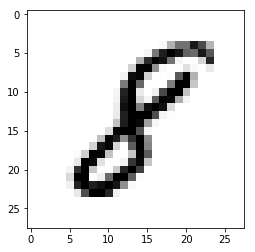

In [6]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [7]:
test = x_train[image_index]
test = np.reshape(test, (-1, 28, 28, 1))


In [8]:
#new = np.concatenate((test, test, test), axis=3)
new = np.concatenate([np.zeros((1, 28, 28, 1)), test, np.zeros((1, 28, 28, 1))], axis=3)


In [9]:
x = new
print len(x[0])
test2 = x_train[image_index + 1]
test2 = np.reshape(test, (-1, 28, 28, 1))
x_hat = np.concatenate([np.zeros((1, 28, 28, 1)), test2, np.zeros((1, 28, 28, 1))], axis=3)

A = [0., 0., 0.]
A_hat = [0.99835324, 0.189828325, .3405974e-10]
ce = tf.nn.sigmoid_cross_entropy_with_logits(labels=A, logits=A_hat)
#y = tf.reduce_mean(ce, axis=1)
with tf.Session() as sess:
    ans = ce.eval()
    print (ans)
    print (np.mean(ans))

28
[1.3120581  0.79255897 0.6931472 ]
0.9325881


(28, 28, 3)


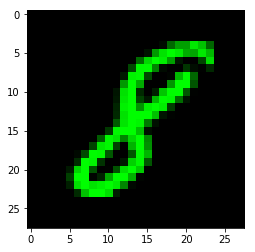

In [10]:
plt.imshow(new[0])
print new[0].shape

# Change y labels

In [11]:
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [12]:
new_y_train = np.array([1 if y < 5 else 0 for y in y_train])
new_y_test = np.array([1 if y < 5 else 0 for y in y_test])

In [13]:
n = 10000

In [14]:
# add noise to label

# I SKIP THIS STEP FOR NEW DATASET
# for i, y in enumerate(new_y_train):
#     if i < n:
#         if np.random.random() < 0.25:
#             new_y_train[i] = 1 - y
#     else:
#         if np.random.random() < 0.25:
#             new_y_train[i] = 1 - y

# for i, y in enumerate(new_y_test):
#     if np.random.random() < 0.25:
#         new_y_test[i] = 1 - y
        

In [15]:
print(np.sum(new_y_train[:n]))
print(np.sum(new_y_train[n:2*n]))

5131
5094


# Decide on color schemes

In [16]:
# unbalanced datasets

new_unbalanced_x_train = np.copy(x_train)
new_unbalanced_y_train = np.copy(new_y_train)
new_unbalanced_x_test = np.copy(x_test)
new_unbalanced_y_test = np.copy(new_y_test)

# counter = 0
# index = 0
# while counter < n:
#     if new_y_train[index] == 0: # digit 0-4
#         if np.random.random() < 0.4: # 0.5 * (1-0.4) = 0.3
#             index += 1
#             continue
#     new_unbalanced_x_train[counter] = x_train[index]
#     new_unbalanced_y_train[counter] = new_y_train[index]
#     counter += 1
#     index += 1

# numPos = 0
# for i in range(n):
#     if new_unbalanced_y_train[i] == 1:
#         numPos += 1
# print(numPos)

# counter = 0
# while counter < n:
#     if new_y_train[index] == 0: # digit 0-4
#         if np.random.random() < 0.4: # 0.5 * (1-0.4) = 0.3
#             index += 1
#             continue
#     new_unbalanced_x_train[n+counter] = x_train[index]
#     new_unbalanced_y_train[n+counter] = new_y_train[index]
#     counter += 1
#     index += 1
    
# numPos = 0
# for i in range(n):
#     if new_unbalanced_y_train[n+i] == 1:
#         numPos += 1
# print(numPos)

# counter = 0
# i = 0
# # print(len(new_y_test))
# while (counter < n) and (i < n):
#     if new_y_test[i] == 1: # digit 5-9
#         if np.random.random() < 0.75: # 0.5 * (1-0.2) = 0.4
#             # skip entry i from new_y_test and x_test
#             i += 1
#             continue
#     new_unbalanced_x_test[counter] = x_test[i]
#     new_unbalanced_y_test[counter] = new_y_test[i]
#     counter += 1
#     i += 1
#     # pass # 50-50 base rate for test study

# numPos = 0
# for i in range(n):
#     if new_unbalanced_y_test[i] == 1:
#         numPos += 1
# print(numPos)



In [17]:
x_train = new_unbalanced_x_train
new_y_train = new_unbalanced_y_train
x_test = new_unbalanced_x_test
new_y_test = new_unbalanced_y_test

In [18]:
# not sure what this is...
new_y_train_dub = np.vstack((1 - new_y_train, new_y_train)).T
print(new_y_train_dub)
new_y_test_dub = np.vstack((1 - new_y_test, new_y_test)).T
new_y_test_dub

[[1 0]
 [0 1]
 [0 1]
 ...
 [1 0]
 [1 0]
 [1 0]]


array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]])

In [19]:
# study 1: red for y=0, green for y=1
# flip colors 80% of time
colors_1 = np.copy(new_y_train[:n])
for i, c in enumerate(colors_1):
    if np.random.random() < 0.9:
        colors_1[i] = 1 - c


# study 2: red for y=0, green for y=1
# flip colors 80% of the time
colors_2 = np.copy(new_y_train[n:2*n])
for i, c in enumerate(colors_2):
    if np.random.random() < 0.1:
        colors_2[i] = 1 - c


# study 3: red for y=0, green for y=1
# flip colors 80% of the time
colors_3 = np.copy(new_y_train[2*n:3*n])
for i, c in enumerate(colors_3):
    if np.random.random() < 0.4:
        colors_3[i] = 1 - c


# study 4: blue for y=0, yellow for y=1
# flip colors 80% of the time
colors_4 = np.copy(new_y_train[3*n:4*n])
for i, c in enumerate(colors_4):
    if np.random.random() < 0.7:
        colors_4[i] = 1 - c


# study 5: purple for y=0, turquoise for y=1
# flip colors 80% of the time
colors_5 = np.copy(new_y_train[4*n:5*n])
for i, c in enumerate(colors_5):
    if c == 1:
        if np.random.random() < 0.8:
            colors_5[i] = 0 # yellow
        elif np.random.random() < 0.5:
            colors_5[i] = 1 # red
        else:
            colors_5[i] = 2 # green
    if c == 0:
        if np.random.random() < 0.7:
            colors_5[i] = 1 # red
        elif np.random.random() < 1.0/3.0:
            colors_5[i] = 0 # yellow
        else:
            colors_5[i] = 2 # green


# study 6: blue for y=0, red for y=1
# flip colors 20% of the time
colors_6 = np.copy(new_y_train[5*n:6*n])
for i, c in enumerate(colors_6):
    if np.random.random() < 0.2:
        colors_6[i] = 1 - c
        
        
# test: red for y=0, green for y = 1
# flip colors 50% of the time

colors_test = np.copy(new_y_test[:n])
for i, c in enumerate(colors_test):
#     colors_test[i] = np.random.randint(0,6)
    if np.random.random() < 0.5:
        colors_test[i] = 1 - c

In [20]:
print(colors_1, colors_2, colors_test)

(array([1, 0, 0, ..., 0, 1, 1]), array([1, 0, 0, ..., 1, 1, 1]), array([0, 0, 1, ..., 0, 0, 0]))


In [21]:
#np.sum(np.abs(colors_1 - new_y_train[:n]))
np.sum(np.abs(colors_2 - new_y_train[n:2*n]))

982

# Change colors

In [22]:
numstudies = 6

In [23]:
new_x_train = np.zeros((numstudies*n, 28, 28, 3))
print new_x_train.shape
new_x_test = np.zeros((n, 28, 28, 3))
print new_x_test.shape

(60000, 28, 28, 3)
(10000, 28, 28, 3)


In [24]:
# study 1
for i in range(n):
    img = np.reshape(x_train[i], (28, 28, 1))
    if colors_1[i] == 0: # turn red
        new = np.concatenate([img, np.zeros(( 28, 28, 1)), np.zeros(( 28, 28, 1))], axis=2)
    else: # turn green
        new = np.concatenate([np.zeros(( 28, 28, 1)), img, np.zeros(( 28, 28, 1))], axis=2)
    new_x_train[i] = new
    
# study 2
for i in range(n):
    img = np.reshape(x_train[n+i], (28, 28, 1))
    if colors_2[i] == 0: # turn red
        new = np.concatenate([img, np.zeros(( 28, 28, 1)), np.zeros(( 28, 28, 1))], axis=2)
    else: # turn green
        new = np.concatenate([np.zeros(( 28, 28, 1)), img, np.zeros(( 28, 28, 1))], axis=2)
    new_x_train[n+i] = new
    
# study 3
for i in range(n):
    img = np.reshape(x_train[2*n + i], (28, 28, 1))
    if colors_3[i] == 0: # turn red
        new = np.concatenate([img, np.zeros(( 28, 28, 1)), np.zeros(( 28, 28, 1))], axis=2)
    else: # turn green
        new = np.concatenate([np.zeros(( 28, 28, 1)), img, np.zeros(( 28, 28, 1))], axis=2)
    new_x_train[2*n + i] = new

# study 4
for i in range(n):
    img = np.reshape(x_train[3*n + i], (28, 28, 1))
    if colors_4[i] == 0: # turn blue
        new = np.concatenate([np.zeros(( 28, 28, 1)), np.zeros(( 28, 28, 1)), img], axis=2)
    else: # turn yellow
        new = np.concatenate([img, img, np.zeros(( 28, 28, 1))], axis=2)
    new_x_train[3*n + i] = new

# study 5
for i in range(n):
    img = np.reshape(x_train[4*n + i], (28, 28, 1))
    if colors_5[i] == 0: # turn yellow
        new = np.concatenate([img, img, np.zeros(( 28, 28, 1))], axis=2)
    elif colors_5[i] == 1: # turn red
        new = np.concatenate([img, np.zeros(( 28, 28, 1)), np.zeros(( 28, 28, 1))], axis=2)
    else: # turn green
        new = np.concatenate([np.zeros(( 28, 28, 1)), img, np.zeros(( 28, 28, 1))], axis=2)
    new_x_train[4*n + i] = new

# study 6
for i in range(n):
    img = np.reshape(x_train[5*n + i], (28, 28, 1))
    if colors_6[i] == 0: # turn blue
        new = np.concatenate([np.zeros(( 28, 28, 1)), np.zeros(( 28, 28, 1)), img], axis=2)
    else: # turn red
        new = np.concatenate([img, np.zeros(( 28, 28, 1)), np.zeros(( 28, 28, 1))], axis=2)
    new_x_train[5*n + i] = new
    
# test
for i in range(n):
    img = np.reshape(x_test[i], (28, 28, 1))
    new = np.concatenate([img, img, img], axis=2)
#     if colors_test[i] == 0: # turn red
#         new = np.concatenate([img, np.zeros(( 28, 28, 1)), np.zeros(( 28, 28, 1))], axis=2)
#     else: # turn green
#         new = np.concatenate([np.zeros(( 28, 28, 1)), img, np.zeros(( 28, 28, 1))], axis=2)

#     if colors_test[i] == 0: # turn red
#         new = np.concatenate([img, np.zeros(( 28, 28, 1)), np.zeros(( 28, 28, 1))], axis=2)
#     elif colors_test[i] == 1: # turn green
#         new = np.concatenate([np.zeros(( 28, 28, 1)), img, np.zeros(( 28, 28, 1))], axis=2)
#     elif colors_test[i] == 2: # turn blue
#         new = np.concatenate([np.zeros(( 28, 28, 1)), np.zeros(( 28, 28, 1)), img], axis=2)
#     elif colors_test[i] == 3: # turn yellow
#         new = np.concatenate([img, img, np.zeros(( 28, 28, 1))], axis=2)
#     elif colors_test[i] == 4: # turn purple
#         new = np.concatenate([img, np.zeros(( 28, 28, 1)), img], axis=2)
#     elif colors_test[i] == 5: # turn turquoise
#         new = np.concatenate([np.zeros(( 28, 28, 1)), img, img], axis=2)
    new_x_test[i] = new

In [25]:
np.mean(np.mean(np.mean(new_x_test, axis=0), axis=0), axis=0)

array([0.13251461, 0.13251461, 0.13251461])

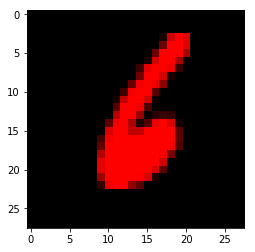

In [26]:
plt.imshow(new_x_train[n-3])
#plt.imshow(new_x_test[n-1])

In [27]:
new_attr_train =  np.concatenate( [ np.vstack([np.ones(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)]).T,
                                   np.vstack([np.zeros(n), np.ones(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)]).T,
                                   np.vstack([np.zeros(n), np.zeros(n), np.ones(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)]).T,
                                   np.vstack([np.zeros(n), np.zeros(n), np.zeros(n), np.ones(n), np.zeros(n), np.zeros(n), np.zeros(n)]).T,
                                   np.vstack([np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.ones(n), np.zeros(n), np.zeros(n)]).T,
                                   np.vstack([np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.ones(n), np.zeros(n)]).T])
# new_attr_train =  np.concatenate( [ np.vstack([np.ones(n), np.zeros(n), np.zeros(n)]).T, 
#                                    np.vstack([np.zeros(n), np.ones(n), np.zeros(n)]).T])

print(new_attr_train)
print(len(new_attr_train))
print(new_attr_train.shape)

new_attr_test = np.vstack([np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.ones(n)]).T
# new_attr_test = np.vstack([np.zeros(n), np.zeros(n), np.ones(n)]).T
print(new_attr_test)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
60000
(60000, 7)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [28]:
new_x_train_reshape = np.reshape(new_x_train, (numstudies*n, 28*28*3))
new_x_test_reshape = np.reshape(new_x_test, (n, 28*28*3))
new_x_test_reshape.shape
#print(new_x_train_reshape.shape)

(10000, 2352)

In [29]:
new_y_train_reshape = new_y_train_dub[:numstudies*n]
print(new_y_train_reshape.shape)
new_y_test_reshape = new_y_test_dub[:n]
new_y_test_reshape.shape

x_test = new_x_test_reshape[:n * numstudies]
x_test.shape

(60000, 2)


(10000, 2352)

In [30]:
numstudies = 6
inds_shuffled = np.random.permutation(numstudies*n)
train_inds = inds_shuffled[:int(.8 * numstudies*n)]
valid_inds = inds_shuffled[int(.8 * numstudies*n):]
print(len(train_inds), len(valid_inds))

(48000, 12000)


In [31]:
print(type(new_attr_train))
print(new_x_train_reshape.shape)

<type 'numpy.ndarray'>
(60000, 2352)


# Save new dataset

In [32]:
num = n * numstudies
# save_file = 'mnist_digit100_color90flipped_testpurple_022120_try_5.npz'
save_file = 'mnist_6study_digit100_123RG806040_4BY70_5-1R10G10Y80-0R70G20Y10_6RB80_testnocolor_041620_try_5.npz'
np.savez(save_file, 
         x_train = new_x_train_reshape[:num], 
         x_test = new_x_test_reshape[:num], 
         y_train = new_y_train_reshape[:num], 
         y_test = new_y_test_reshape[:num], 
         attr_train = new_attr_train[:num],
         attr_test = new_attr_test[:num],
         train_inds = train_inds,
         valid_inds = valid_inds)

'''
np.savez('mnist_nonoise_072219.npz', 
         x_train = new_x_train_reshape, 
         x_test = new_x_test_reshape, 
         y_train = new_y_train_reshape, 
         y_test = new_y_test_reshape, 
         attr_train = new_attr_train,
         attr_test = new_attr_test,
         train_inds = train_inds,
         valid_inds = valid_inds)
'''

"\nnp.savez('mnist_nonoise_072219.npz', \n         x_train = new_x_train_reshape, \n         x_test = new_x_test_reshape, \n         y_train = new_y_train_reshape, \n         y_test = new_y_test_reshape, \n         attr_train = new_attr_train,\n         attr_test = new_attr_test,\n         train_inds = train_inds,\n         valid_inds = valid_inds)\n"

# print (num)
print (new_y_train_reshape[0])
counter = 0
for y in new_y_train_reshape[n:2*n]:
    if y[1] == 1:
        counter += 1
print(counter)

# And that's it for generating the color dataset!
### Things that could be changed include:
- using more colors, eg. red and green in study 1, green and blue in study 2, and blue and red in study 3, etc.
- adding lateral translations of images or adding noise

# Examining reconstruction results (and comparing to ground-truth data)
The rest of this notebook has code I used to compare the results from model reconstructions to the original inputs.

In [33]:
# myfilename = '/Users/rachelh/Programs/rvr/src/data_processing/mnist_6study_digit75_123RG806040_4BY70_5-1R10G10Y80-0R70G20Y10_6RB80_testnocolor_041620.npz'
myfilename = '/Users/rachelh/Programs/TFDatasets/pacs_S_test_042420_64.npz'
data = np.load(myfilename)

In [34]:
np.mean(data['y_test'], axis=0)

array([0.49564635, 0.50435365])

In [7]:
from sys import getsizeof
getsizeof(data['x_train'])
#data['x_test'].shape
122880112

122880112

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
def get_valid_imgs_from_study(data, valid_xs=None, study_id=None):
    if not valid_xs.any():
        valid_xs = data['x_train'][data['valid_inds']]
    if not study_id:
        return valid_xs
    else:
        valid_study_ids = data['attr_train'][data['valid_inds']]
        valid_xs_from_study = []
        for i in range(len(valid_xs)):
            if np.all(valid_study_ids[i] == study_id):
                valid_xs_from_study.append(valid_xs[i])
        return np.asarray(valid_xs_from_study)
                
        
        

In [10]:
this_valid_inds= data['valid_inds']

In [45]:
# Load outputs from the decoder (the reconstructed inputs)
num = 1000
#xhat = np.load('/Users/Frances/Documents/seas-fellowship/rvr/mnist_fair10_recon005_ep9500_xhat.npz')['X']
# xhat = np.load('/Users/rachelh/Programs/rvr/reconstructed_inputs/mnist_6study_digit75_uneqcolor_testnocolor_041620_valid_x_hat.npz')['X']
xhat = np.load('/Users/rachelh/Programs/rvr/reconstructed_inputs/pacs_C_test_042420_z_1000_fair_0_05_recon_0_25_valid_x_hat.npz')['X']
print(xhat.shape)
# print(len(data['x_train'][data['valid_inds'][:num]][0]))


(100, 12288)


[6.21492386 6.52999353 5.85135651 ... 1.5529747  1.25089502 0.87225008]


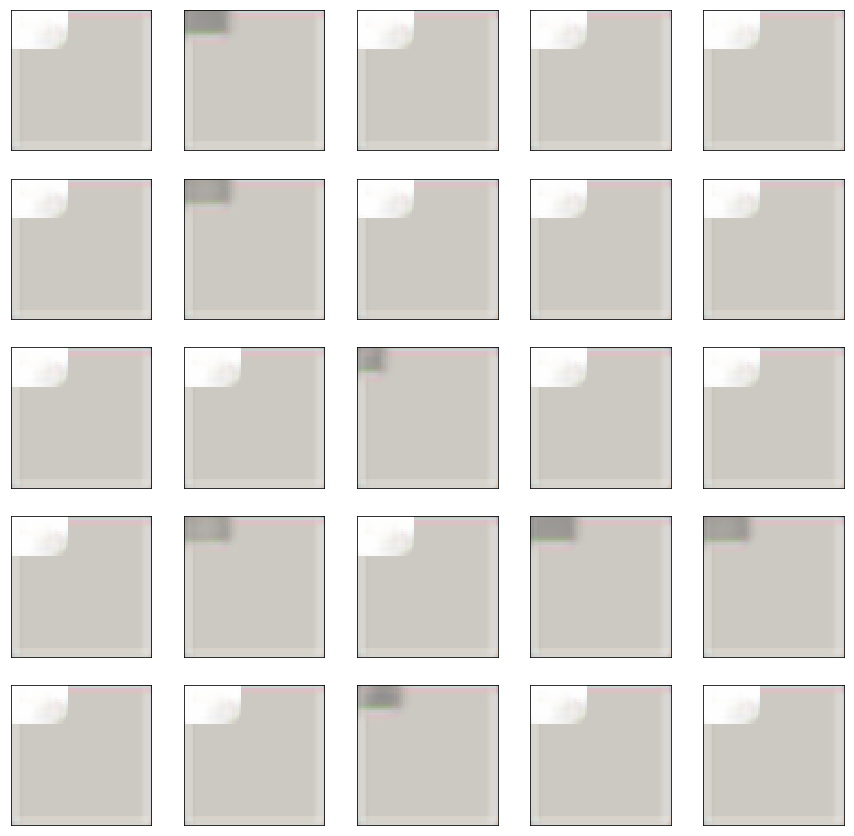

In [46]:
num = 25
#plt.imshow(np.reshape(xhat[idx], (28, 28, 3)))
#show_images_grid(np.reshape(sigmoid(xhat[study3_idx[:num]]), (-1, 28, 28, 3)), num)
print(((xhat[:num])[0]))
x = get_valid_imgs_from_study(data, xhat)
# show_images_grid(np.reshape(sigmoid(x[:num]), (-1, 28, 28, 3)), num)
show_images_grid(np.reshape(sigmoid(x[:num]), (-1, 64, 64, 3)), num)
#show_images_grid(np.reshape(sigmoid(xhat[:num]), (-1, 28, 28, 3)), num)

[1. 0. 0. 0. 0. 0. 0.]
(12000, 2352)


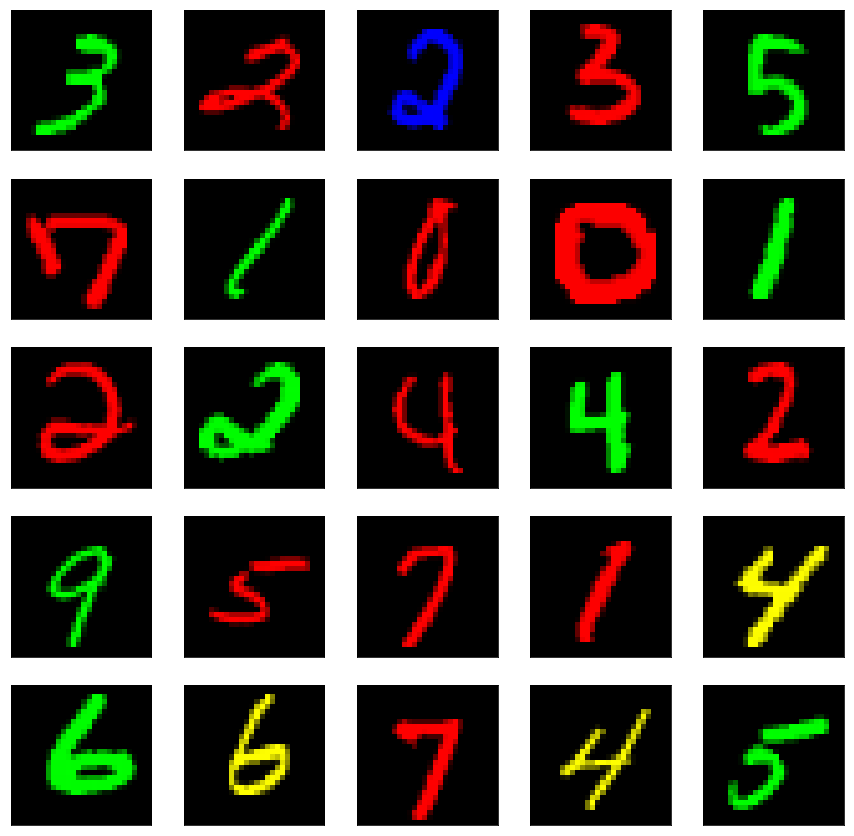

In [33]:
# show ground truth images
num = 25
data = np.load('/Users/rachelh/Programs/rvr/src/data_processing/mnist_6study_digit75_123RG806040_4BY70_5-1R10G10Y80-0R70G20Y10_6RB80_testnocolor_041620.npz')
# data = np.load('/Users/rachelh/Programs/TFDatasets/pacs_P_test_042420_64.npz')
x = get_valid_imgs_from_study(data, np.asarray([]))
print(data['attr_train'][2])
print(x.shape)
show_images_grid(np.reshape((x[:num]), (-1, 28, 28, 3)), num)
# show_images_grid(np.reshape((x[:num]), (-1, 64, 64, 3)), num)

In [48]:
# Load test outputs from the decoder (the reconstructed inputs)

#xhat = np.load('/Users/Frances/Documents/seas-fellowship/rvr/mnist_fair10_recon005_ep9500_xhat.npz')['X']
# xhat = np.load('/Users/rachelh/Programs/rvr/reconstructed_inputs/mnist_6study_digit75_uneqcolor_testnocolor_041620_1_recon_test_x_hat.npz')['X']
xhat = np.load('/Users/rachelh/Programs/rvr/reconstructed_inputs/pacs_C_test_042420_z_1000_fair_0_05_recon_0_25_test_x_hat.npz')['X']
print(xhat.shape)
#print(len(data['x_test'][data['valid_inds'][:num]][0]))


(100, 12288)


12288
2352


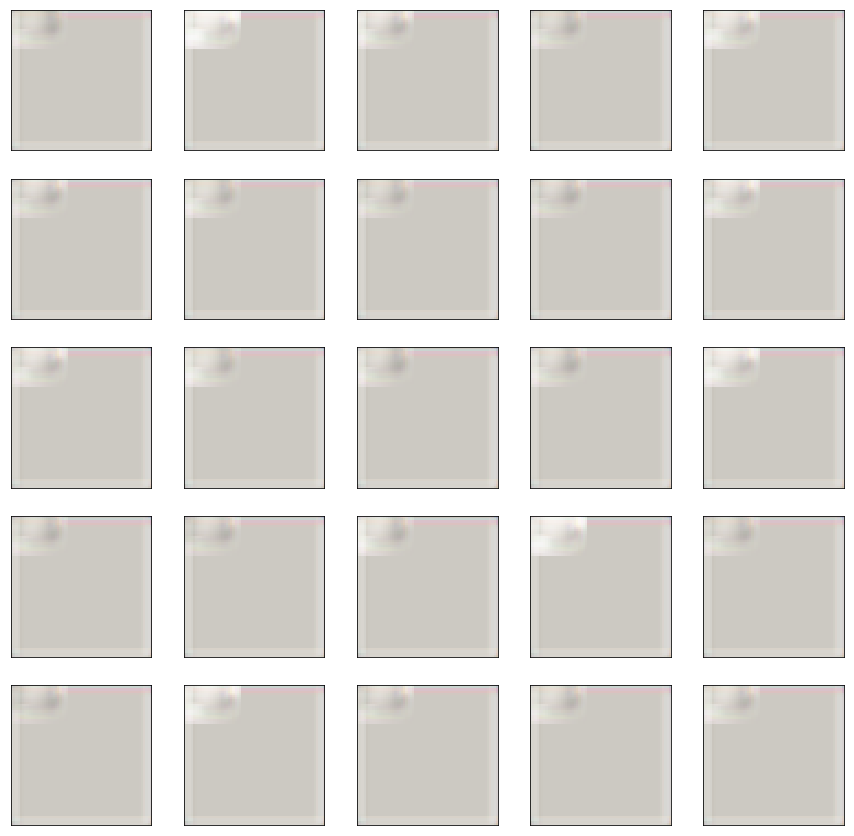

In [49]:
num = 25
#plt.imshow(np.reshape(xhat[idx], (28, 28, 3)))
#show_images_grid(np.reshape(sigmoid(xhat[study3_idx[:num]]), (-1, 28, 28, 3)), num)
print(len((xhat[:num])[0]))
arr = [row[:2352] for row in sigmoid(xhat[:num])]
print len(arr[0])
# show_images_grid(np.reshape(sigmoid(xhat[:num]), (-1, 28, 28, 3)), num)
show_images_grid(np.reshape(sigmoid(xhat[:num]), (-1, 64, 64, 3)), num)

# show_images_grid(np.reshape(sigmoid(xhat[:num]), (-1, 28, 28, 3)), num)

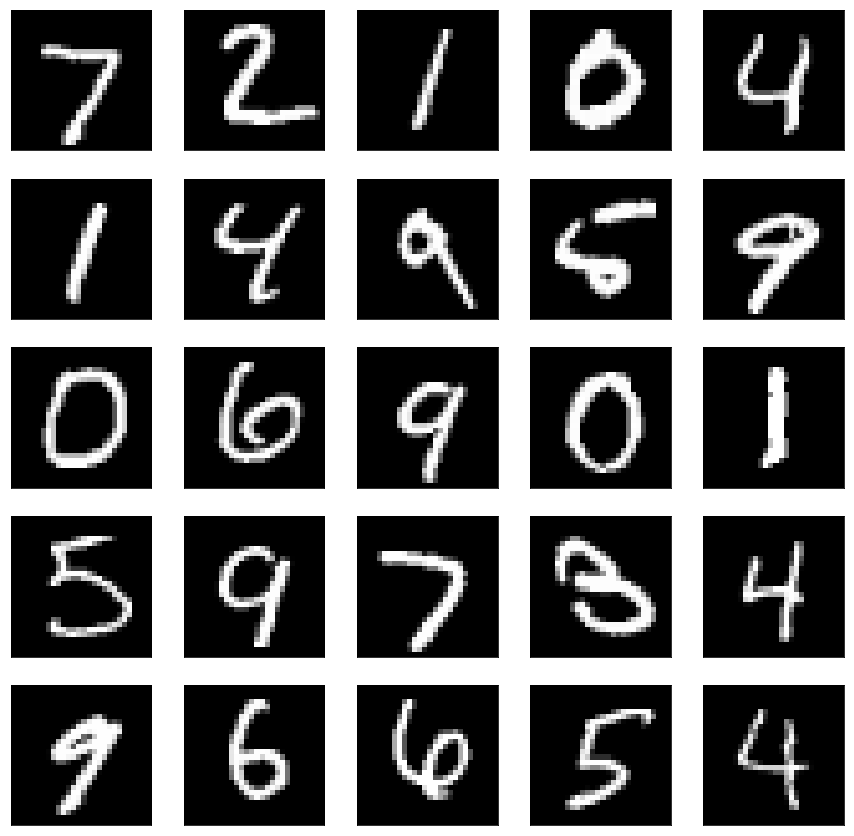

In [19]:
# show ground truth test images
new_x_test_reshape = data['x_test']
show_images_grid(np.reshape(new_x_test_reshape[:num], (-1, 28, 28, 3)), num)

In [256]:
# Load outputs from the decoder (the reconstructed inputs)

#xhat = np.load('/Users/Frances/Documents/seas-fellowship/rvr/mnist_fair10_recon005_ep9500_xhat.npz')['X']
xhat = np.load('/Users/rachelh/Programs/rvr/reconstructed_inputs/mnist_simple_1study_102319_half_include_id/Valid_X_hat.npz')['X']
print(xhat.shape)
print(len(data['x_train'][data['valid_inds'][:num]][0]))


(100, 2355)
2352


2355
2352


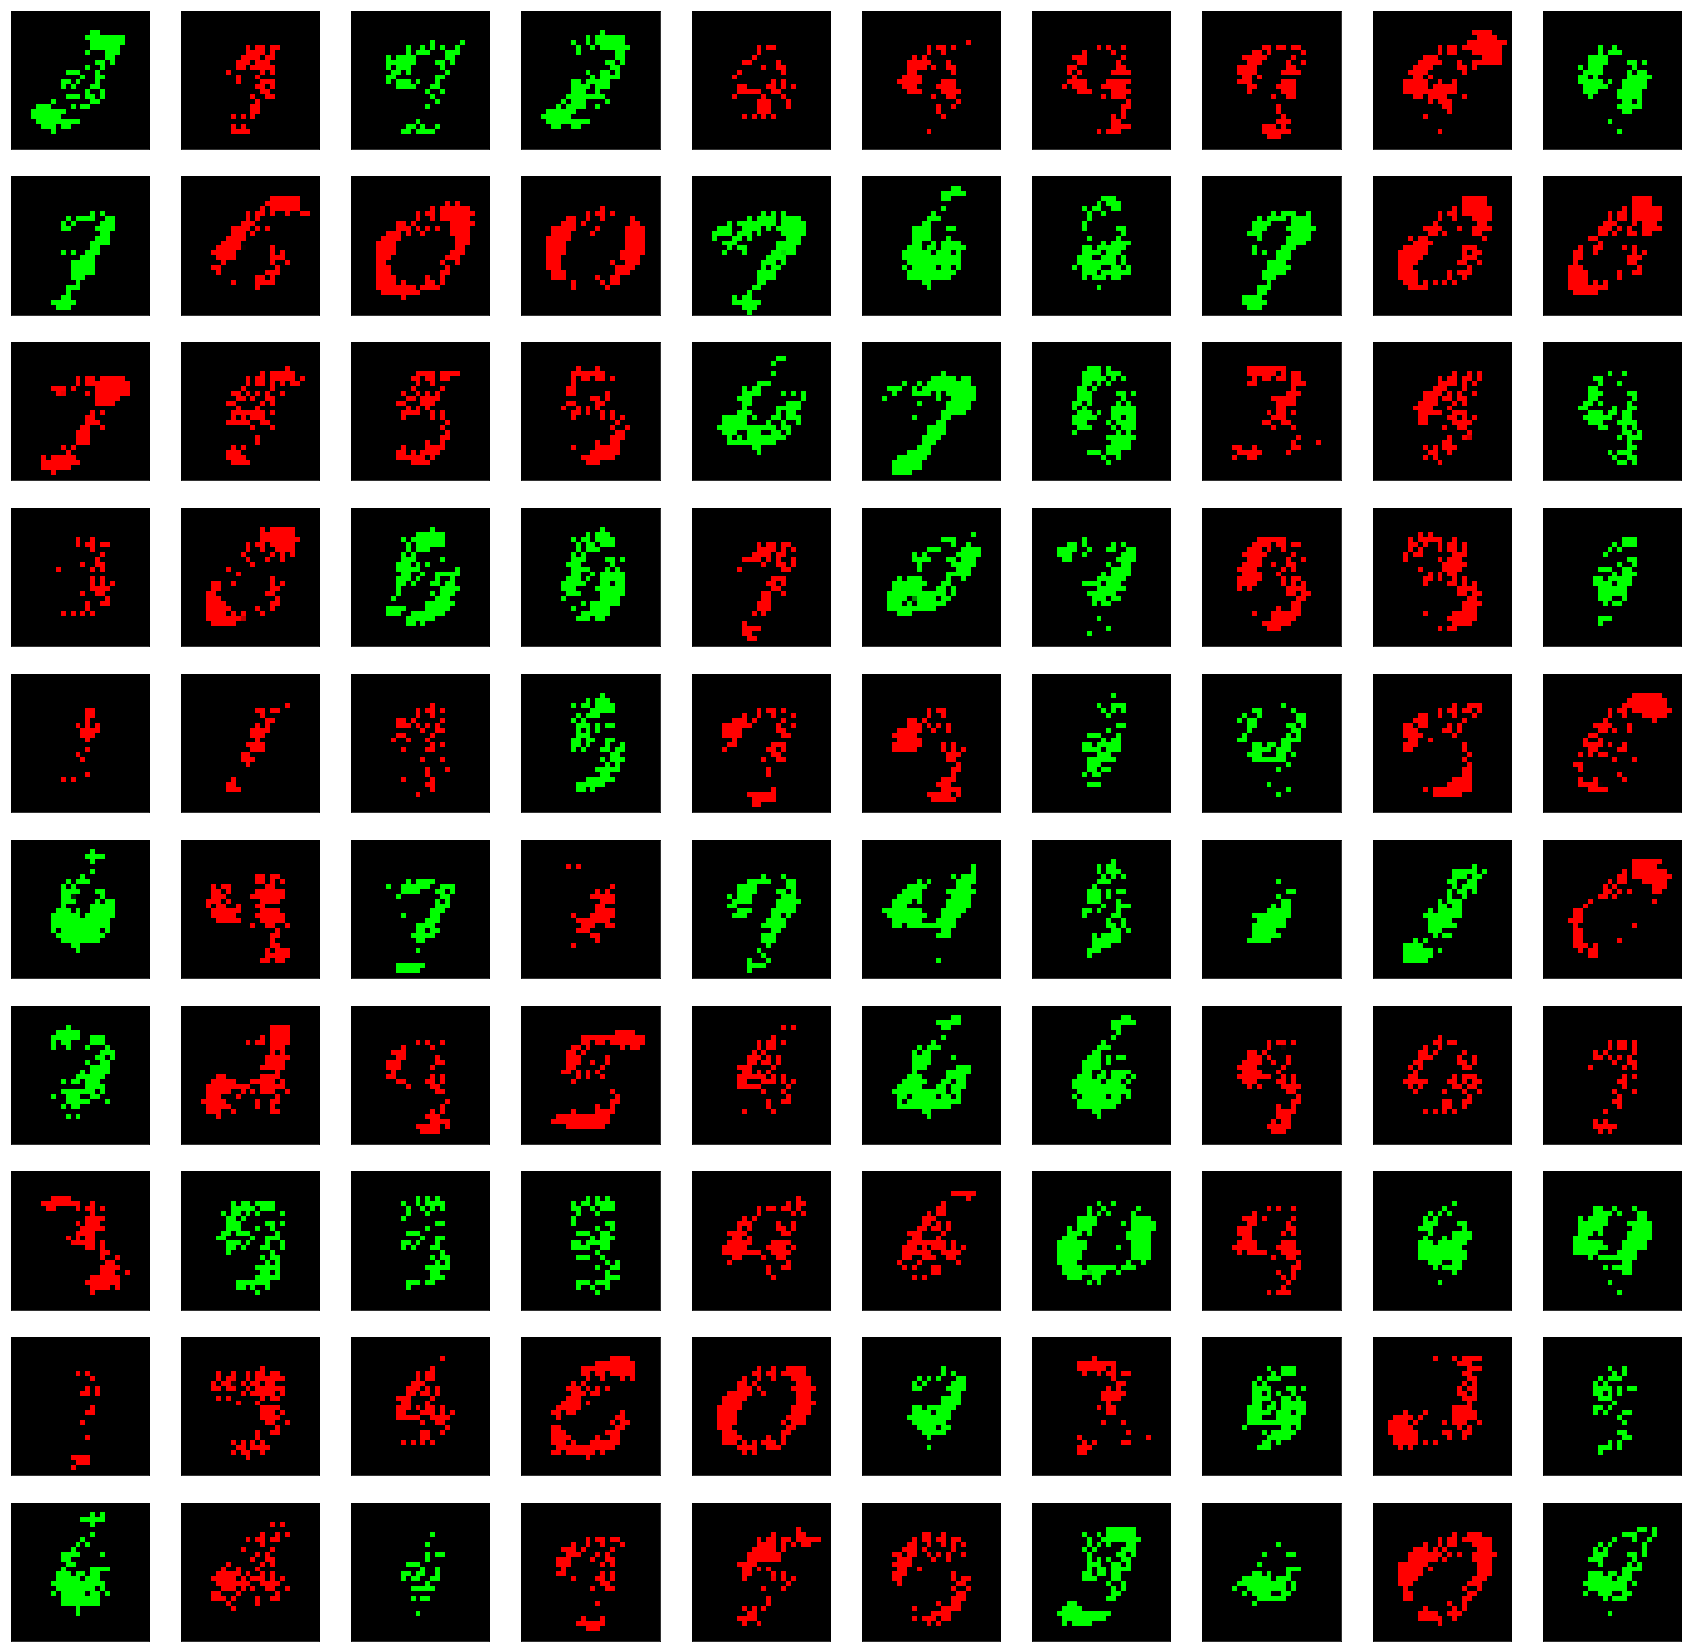

In [257]:
num = 100
#plt.imshow(np.reshape(xhat[idx], (28, 28, 3)))
#show_images_grid(np.reshape(sigmoid(xhat[study3_idx[:num]]), (-1, 28, 28, 3)), num)
print(len((xhat[:num])[0]))
arr = [row[:2352] for row in sigmoid(xhat[:num])]
print len(arr[0])
show_images_grid(np.reshape(arr, (-1, 28, 28, 3)), num)
# show_images_grid(np.reshape(sigmoid(xhat[:num]), (-1, 28, 28, 3)), num)

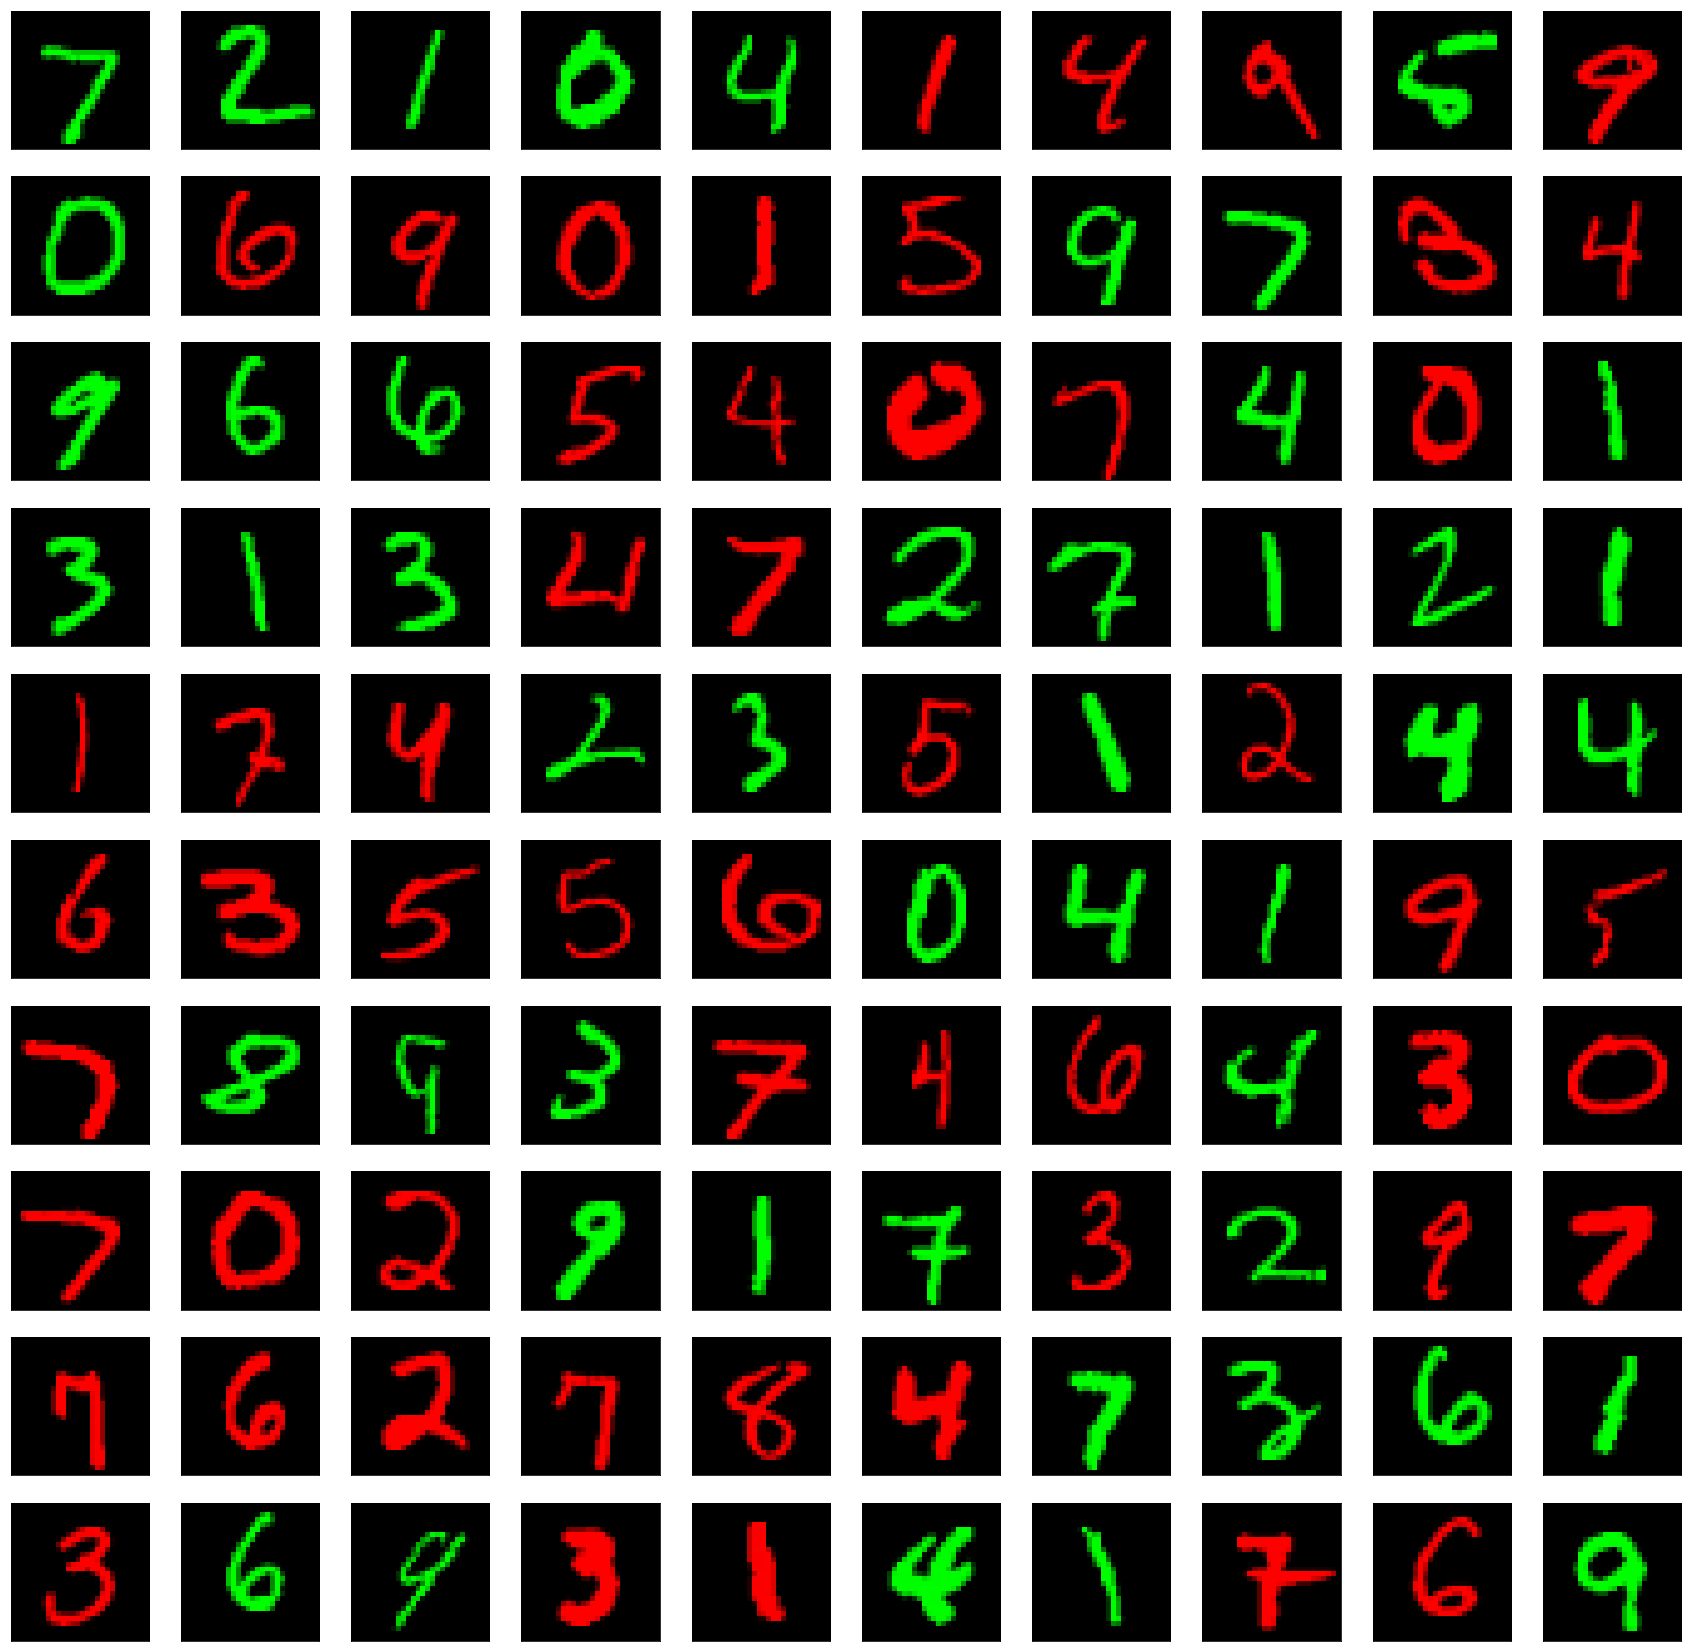

In [146]:
# show ground truth images
show_images_grid(np.reshape(data['x_test'], (-1, 28, 28, 3)), num)

In [191]:
# Load test outputs from the decoder (the reconstructed inputs)

#xhat = np.load('/Users/Frances/Documents/seas-fellowship/rvr/mnist_fair10_recon005_ep9500_xhat.npz')['X']
xhat = np.load('/Users/rachelh/Programs/rvr/reconstructed_inputs/mnist_small_study_102919/1_class_1_fairness_1_recon_valid_npz/X_hat.npz')['X']
print(xhat.shape)
#print(len(data['x_test'][data['valid_inds'][:num]][0]))


(100, 2352)


2352
2352


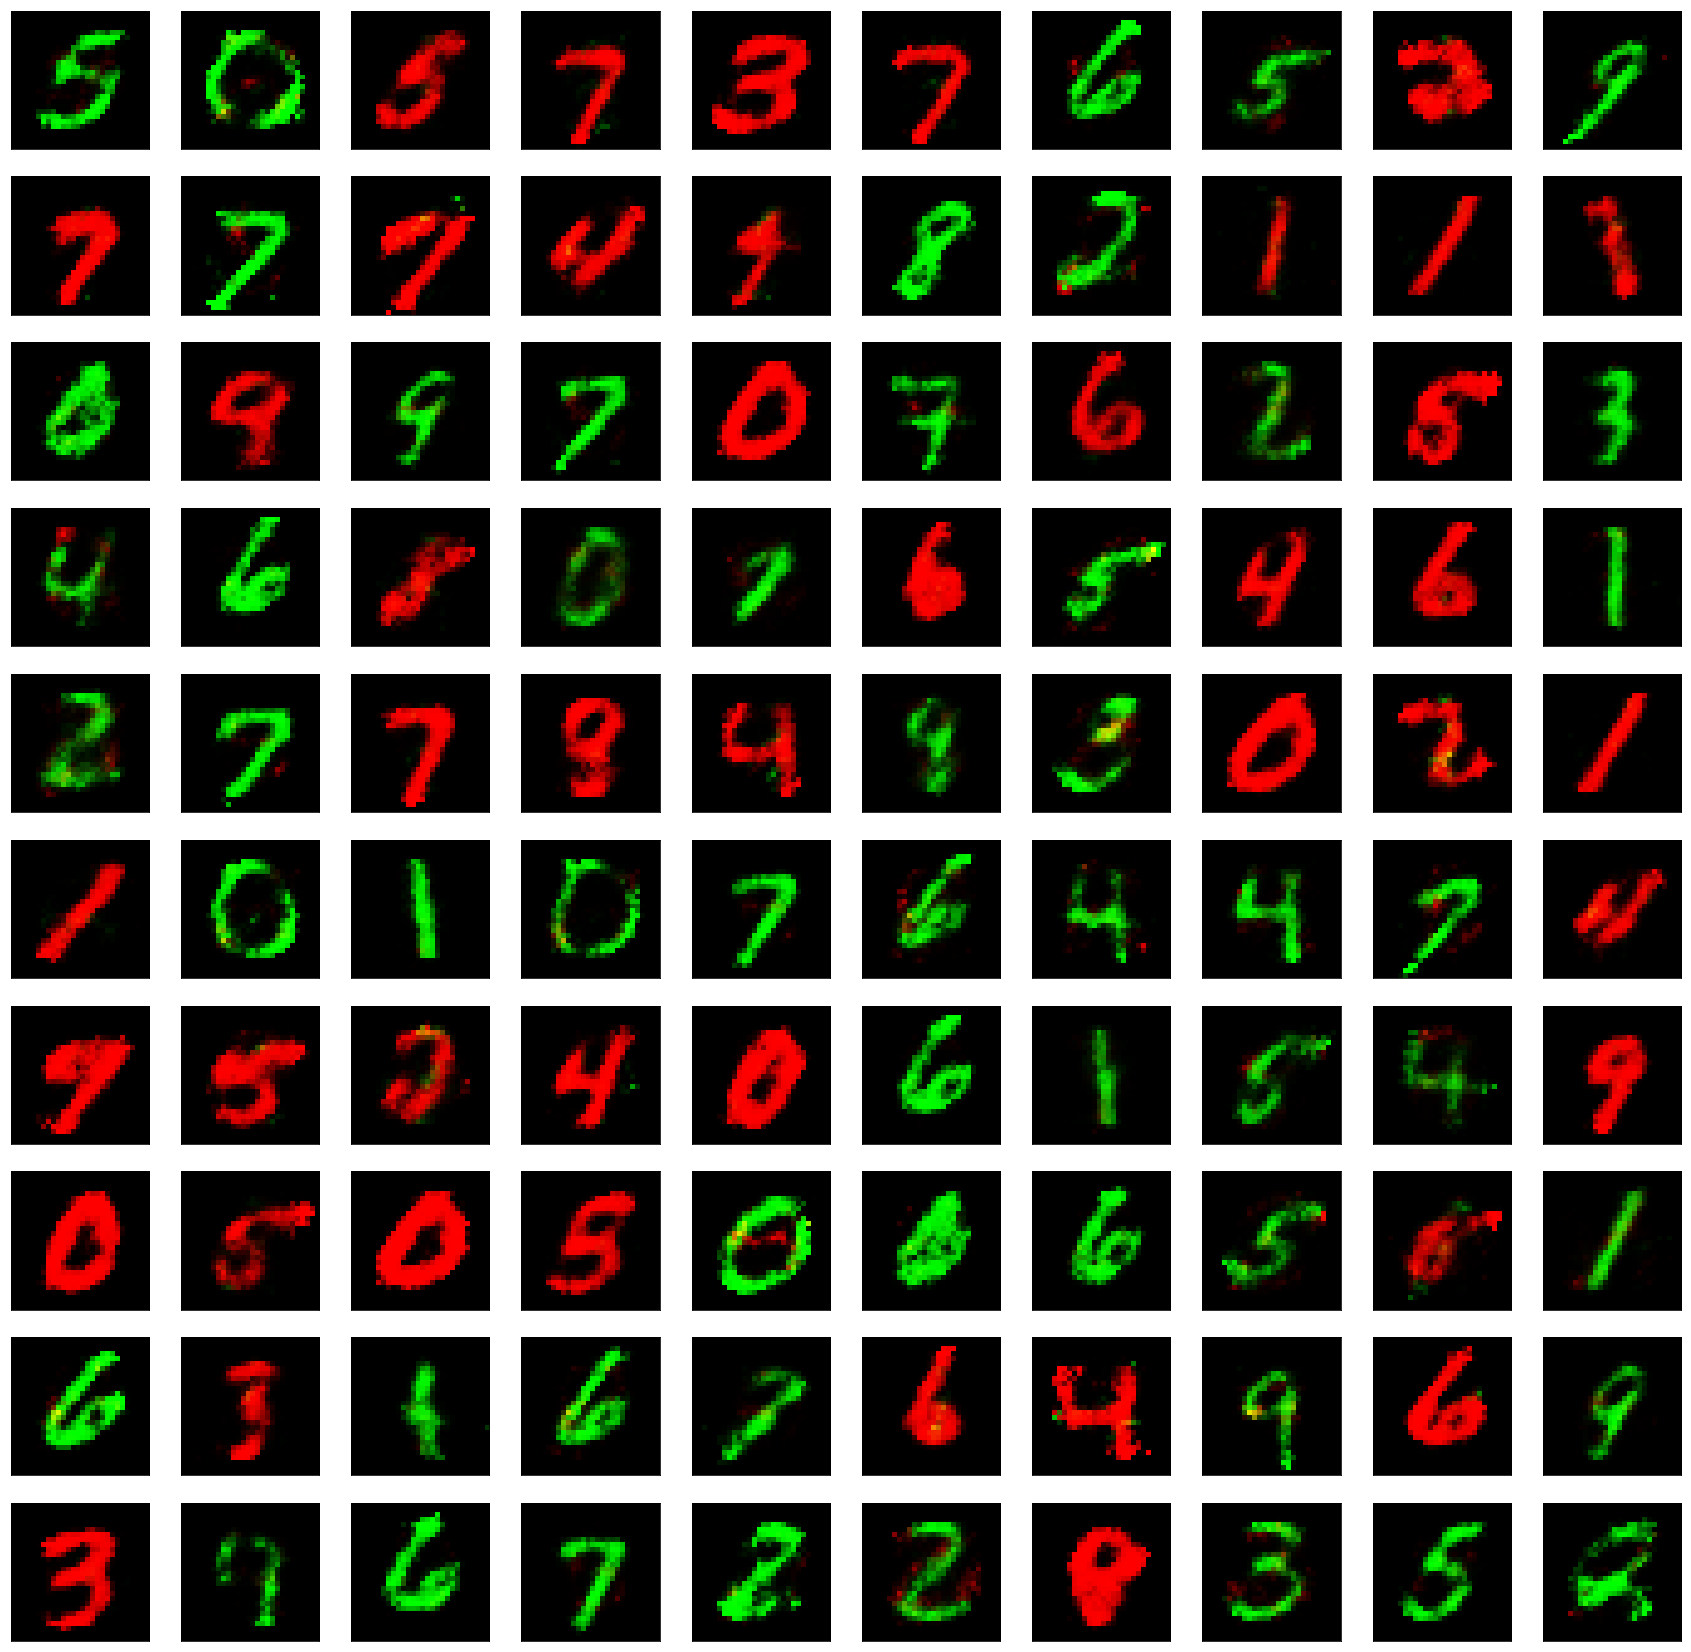

In [192]:
num = 100
#plt.imshow(np.reshape(xhat[idx], (28, 28, 3)))
#show_images_grid(np.reshape(sigmoid(xhat[study3_idx[:num]]), (-1, 28, 28, 3)), num)
print(len((xhat[:num])[0]))
arr = [row[:2352] for row in sigmoid(xhat[:num])]
print len(arr[0])
show_images_grid(np.reshape(arr, (-1, 28, 28, 3)), num)
# show_images_grid(np.reshape(sigmoid(xhat[:num]), (-1, 28, 28, 3)), num)

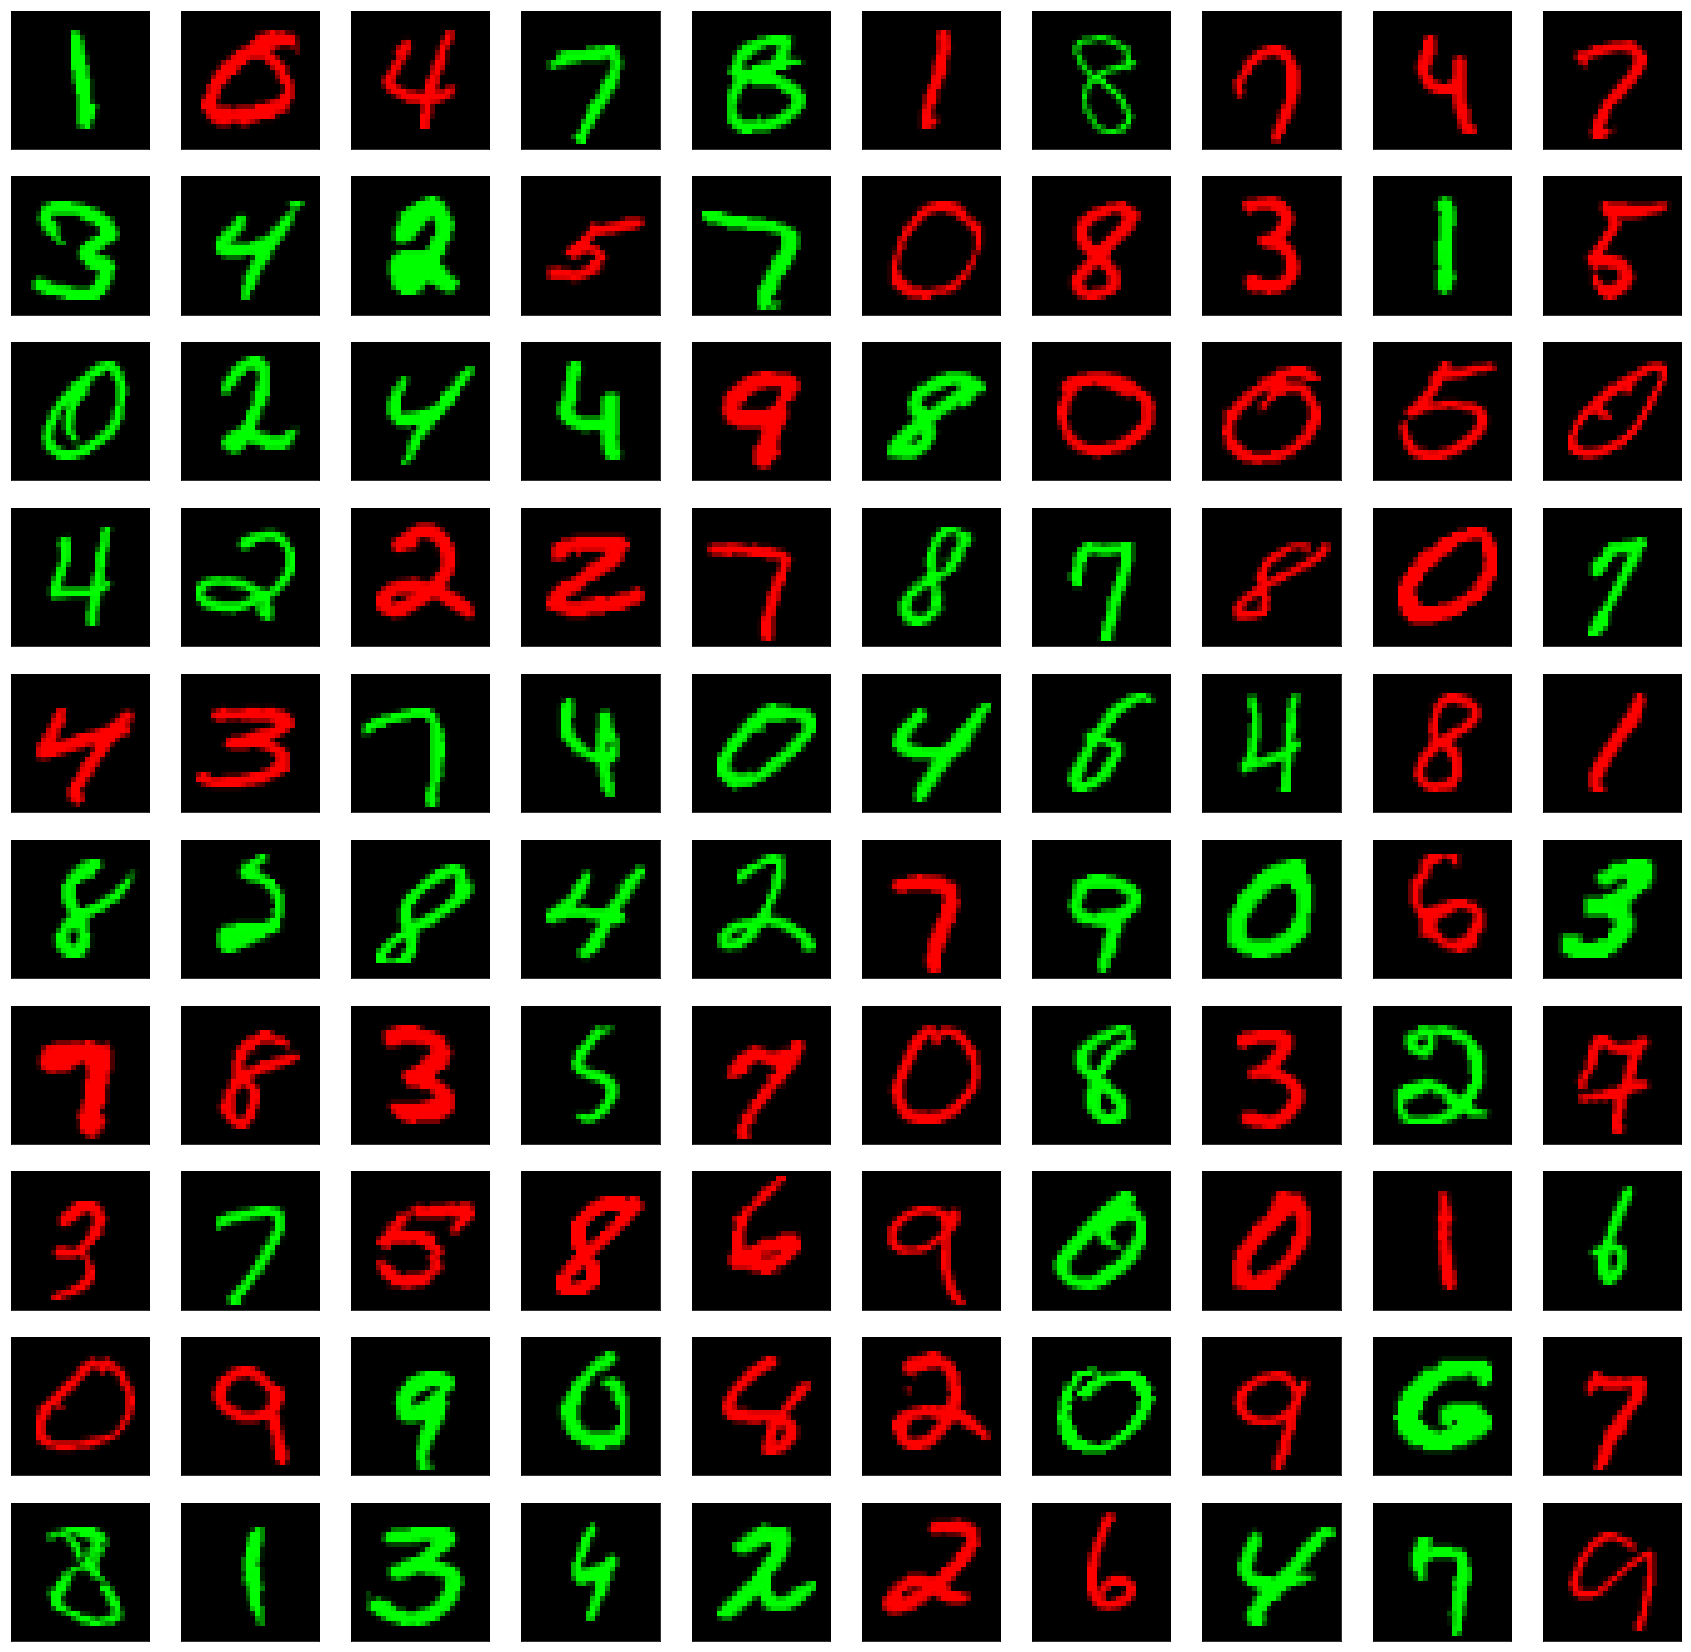

In [144]:
show_images_grid(np.reshape(data['x_test'][data['valid_inds']][:100], (-1, 28, 28, 3)), 100)

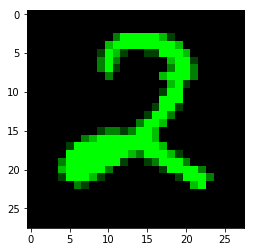

In [63]:
plt.imshow(np.reshape(new_x_train_reshape[valid_inds[0]], (28, 28,3)))

In [ ]:
y_train[valid_inds[:9]]

In [ ]:
study1_idx = []
study2_idx = []
study3_idx = []
for idx, attr in enumerate(new_attr_train[this_valid_inds[:5951]]):
    if attr[0] == 1:
        study1_idx.append(idx)
    elif attr[1] == 1:
        study2_idx.append(idx)
    elif attr[2] == 1:
        study3_idx.append(idx)
study1_idx = np.array(study1_idx)
study2_idx = np.array(study2_idx)
study3_idx = np.array(study3_idx)

In [ ]:
print(study1_idx.shape, study2_idx.shape, study3_idx.shape)

In [ ]:
new_x_train_reshape.shape

In [ ]:
for idx in range(2*n+35, 2*n+40):
    plt.imshow(np.reshape(new_x_train_reshape[idx], (28, 28, 3)))
    print(new_y_train_reshape[idx])
    plt.show()

In [428]:
for idx in range(n+10, n+20):
    print(new_y_train_reshape[idx])

[1 0]
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]


In [296]:
# Helper function to show multiple images at once, in a grid.
def show_study_grid(studies, num=50):
  ncols = 3 #int(np.ceil(num**0.5))
  nrows = int(np.ceil(num / ncols))
  for i in range(nrows):
    s = ""
    for j in range(ncols):
        s += "["
        arr = studies[i*ncols + j]
        for elem in arr:
            s += str(round(elem, 2))
            s += " "
        s += "] "
    print s
        

In [297]:
# Load true study id outputs (a)

a = np.load('/Users/rachelh/Programs/rvr/reconstructed_inputs/mnist_digit75_color80test_5050_041020_grid_search_xavier_fair_0_05_recon_0_25_valid_npz/A.npz')['X']
print(a.shape)
show_study_grid(a)


(3968, 3)
[1.0 0.0 0.0 ] [1.0 0.0 0.0 ] [1.0 0.0 0.0 ] 
[1.0 0.0 0.0 ] [1.0 0.0 0.0 ] [0.0 1.0 0.0 ] 
[1.0 0.0 0.0 ] [0.0 1.0 0.0 ] [1.0 0.0 0.0 ] 
[1.0 0.0 0.0 ] [0.0 1.0 0.0 ] [0.0 1.0 0.0 ] 
[1.0 0.0 0.0 ] [1.0 0.0 0.0 ] [0.0 1.0 0.0 ] 
[0.0 1.0 0.0 ] [1.0 0.0 0.0 ] [1.0 0.0 0.0 ] 
[0.0 1.0 0.0 ] [0.0 1.0 0.0 ] [1.0 0.0 0.0 ] 
[1.0 0.0 0.0 ] [1.0 0.0 0.0 ] [1.0 0.0 0.0 ] 
[1.0 0.0 0.0 ] [1.0 0.0 0.0 ] [1.0 0.0 0.0 ] 
[0.0 1.0 0.0 ] [1.0 0.0 0.0 ] [1.0 0.0 0.0 ] 
[1.0 0.0 0.0 ] [0.0 1.0 0.0 ] [0.0 1.0 0.0 ] 
[1.0 0.0 0.0 ] [0.0 1.0 0.0 ] [1.0 0.0 0.0 ] 
[0.0 1.0 0.0 ] [1.0 0.0 0.0 ] [0.0 1.0 0.0 ] 
[0.0 1.0 0.0 ] [1.0 0.0 0.0 ] [1.0 0.0 0.0 ] 
[1.0 0.0 0.0 ] [1.0 0.0 0.0 ] [1.0 0.0 0.0 ] 
[1.0 0.0 0.0 ] [1.0 0.0 0.0 ] [1.0 0.0 0.0 ] 


In [298]:
# Load determined study id outputs (a hat)

a_hat = np.load('/Users/rachelh/Programs/rvr/reconstructed_inputs/mnist_digit75_color80test_5050_041020_grid_search_xavier_fair_0_05_recon_0_25_valid_npz/A_hat.npz')['X']
show_study_grid(a_hat)


[0.6 0.64 0.51 ] [0.6 0.65 0.51 ] [0.61 0.64 0.51 ] 
[0.61 0.64 0.51 ] [0.6 0.64 0.51 ] [0.62 0.63 0.51 ] 
[0.6 0.64 0.5 ] [0.6 0.64 0.51 ] [0.61 0.64 0.52 ] 
[0.6 0.64 0.52 ] [0.62 0.63 0.5 ] [0.61 0.63 0.53 ] 
[0.6 0.64 0.51 ] [0.62 0.63 0.5 ] [0.61 0.64 0.52 ] 
[0.6 0.64 0.52 ] [0.61 0.64 0.51 ] [0.6 0.64 0.52 ] 
[0.6 0.64 0.51 ] [0.64 0.61 0.5 ] [0.6 0.64 0.52 ] 
[0.62 0.63 0.49 ] [0.59 0.65 0.51 ] [0.6 0.64 0.52 ] 
[0.6 0.65 0.51 ] [0.6 0.64 0.51 ] [0.62 0.62 0.49 ] 
[0.61 0.63 0.52 ] [0.6 0.64 0.52 ] [0.6 0.65 0.5 ] 
[0.6 0.65 0.52 ] [0.61 0.63 0.51 ] [0.6 0.64 0.51 ] 
[0.6 0.64 0.52 ] [0.61 0.63 0.52 ] [0.6 0.65 0.51 ] 
[0.61 0.64 0.5 ] [0.61 0.64 0.51 ] [0.6 0.64 0.52 ] 
[0.6 0.64 0.52 ] [0.6 0.64 0.51 ] [0.61 0.64 0.5 ] 
[0.61 0.64 0.53 ] [0.61 0.64 0.52 ] [0.61 0.63 0.52 ] 
[0.61 0.64 0.51 ] [0.61 0.64 0.51 ] [0.6 0.64 0.51 ] 


In [50]:
# Load determined TEST study id outputs (a hat)

a_hat = np.load('/Users/rachelh/Programs/rvr/reconstructed_inputs/mnist_digit75_color80test_5050_xavier_0_05_recon_0_05_fair_test_npz/A.npz')['X']
show_study_grid(a_hat)


[0.0 0.0 1.0 ] [0.0 0.0 1.0 ] [0.0 0.0 1.0 ] 
[0.0 0.0 1.0 ] [0.0 0.0 1.0 ] [0.0 0.0 1.0 ] 
[0.0 0.0 1.0 ] [0.0 0.0 1.0 ] [0.0 0.0 1.0 ] 
[0.0 0.0 1.0 ] [0.0 0.0 1.0 ] [0.0 0.0 1.0 ] 
[0.0 0.0 1.0 ] [0.0 0.0 1.0 ] [0.0 0.0 1.0 ] 
[0.0 0.0 1.0 ] [0.0 0.0 1.0 ] [0.0 0.0 1.0 ] 
[0.0 0.0 1.0 ] [0.0 0.0 1.0 ] [0.0 0.0 1.0 ] 
[0.0 0.0 1.0 ] [0.0 0.0 1.0 ] [0.0 0.0 1.0 ] 
[0.0 0.0 1.0 ] [0.0 0.0 1.0 ] [0.0 0.0 1.0 ] 
[0.0 0.0 1.0 ] [0.0 0.0 1.0 ] [0.0 0.0 1.0 ] 
[0.0 0.0 1.0 ] [0.0 0.0 1.0 ] [0.0 0.0 1.0 ] 
[0.0 0.0 1.0 ] [0.0 0.0 1.0 ] [0.0 0.0 1.0 ] 
[0.0 0.0 1.0 ] [0.0 0.0 1.0 ] [0.0 0.0 1.0 ] 
[0.0 0.0 1.0 ] [0.0 0.0 1.0 ] [0.0 0.0 1.0 ] 
[0.0 0.0 1.0 ] [0.0 0.0 1.0 ] [0.0 0.0 1.0 ] 
[0.0 0.0 1.0 ] [0.0 0.0 1.0 ] [0.0 0.0 1.0 ] 


In [299]:
# Load latent representations (z)

z = np.load('/Users/rachelh/Programs/rvr/reconstructed_inputs/mnist_digit75_color80test_5050_041020_grid_search_xavier_fair_0_05_recon_0_25_valid_npz/Z.npz')['X']
a = np.load('/Users/rachelh/Programs/rvr/reconstructed_inputs/mnist_digit75_color80test_5050_041020_grid_search_xavier_fair_0_05_recon_0_25_valid_npz/A.npz')['X']
# z_study_1 = []
# z_study_2 = []
# for i in range(len(a)):
#     if np.all(a[i] == [1.,0.,0.]):
#         z_study_1.append(z[i])
#     elif np.all(a[i] == [0.,1.,0.]):
#         z_study_2.append(z[i])
#     else:
#         raise ValueError()
# z_study_1 = np.asarray(z_study_1)
# z_study_2 = np.asarray(z_study_2)
y_study_id = a[:,0]
# z.shape


In [300]:
labels = np.load('/Users/rachelh/Programs/rvr/reconstructed_inputs/mnist_digit75_color80test_5050_041020_grid_search_xavier_fair_0_05_recon_0_25_valid_npz/Y.npz')['X']
y_label = labels[:,0]
y_label.shape

(3968,)

In [301]:
data = np.load('/Users/rachelh/Programs/rvr/src/data_processing/mnist_digit75_color80test_5050_041020.npz')
# data = np.load('/Users/rachelh/Programs/TFDatasets/pacs_S_test_042420_64.npz')
x = get_valid_imgs_from_study(data, np.asarray([]))
# x = data['x_train']
x.shape
np.mean(x[1,0::3])
y_color = [] # 0 if red, 1 if green
for i in range(len(x)):
    if np.mean(x[i, 0::3]) > 0:
        y_color.append(0)
    elif np.mean(x[i, 1::3]) > 0:
        y_color.append(1)
y_color = np.asarray(y_color)
y_color

array([0, 1, 1, ..., 1, 1, 1])

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [303]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(z)
y_kmeans = kmeans.predict(z)

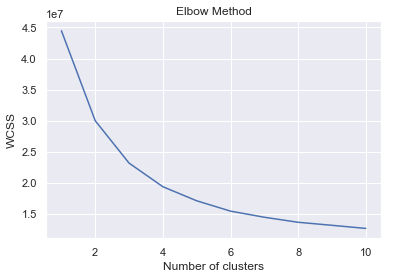

In [304]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(z)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [305]:
z[1000, 1]

-2.036914348602295

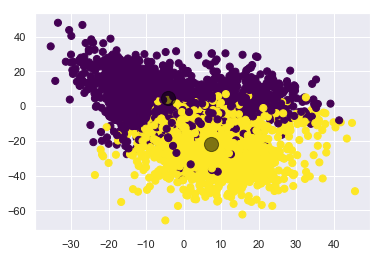

In [306]:
plt.scatter(z[:, 0], z[:, 1], c=y_kmeans, s=50, cmap='viridis')

kmeans = KMeans(n_clusters=2, max_iter=300, n_init=10, random_state=0)
kmeans.fit(z)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

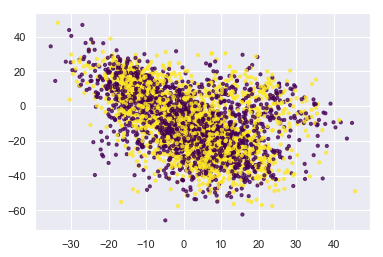

In [310]:
plt.scatter(z[:, 0], z[:, 1], c=y_study_id[:3968], s=10, cmap='viridis', alpha=0.75)

centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

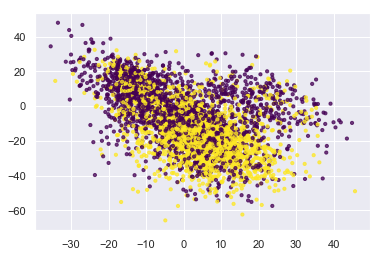

In [311]:
plt.scatter(z[:, 0], z[:, 1], c=y_label[:3968], s=10, cmap='viridis', alpha=0.75)

centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

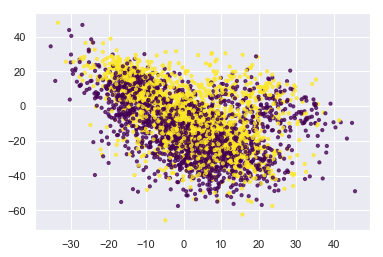

In [312]:
plt.scatter(z[:, 0], z[:, 1], c=y_color[:3968], s=10, cmap='viridis', alpha=0.75)

centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

[1. 0. 0. ... 1. 0. 0.]


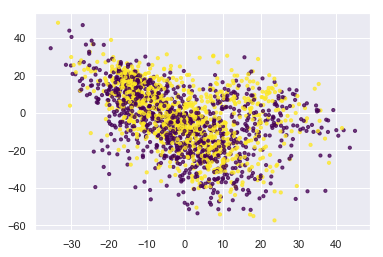

In [314]:
neg_z = []
neg_a = []
pos_z = []
pos_a = []
print(y_label)
for i in range(len(z)):
    if y_label[i] == 0:
        neg_z.append(z[i])
        neg_a.append(y_study_id[i])
    else:
        pos_z.append(z[i])
        pos_a.append(y_study_id[i])

neg_z = np.asarray(neg_z)
neg_a = np.asarray(neg_a)
pos_z = np.asarray(pos_z)
pos_a = np.asarray(pos_a)

plt.scatter(neg_z[:, 0], neg_z[:, 1], c=neg_a[:3968], s=10, cmap='viridis', alpha=0.75)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

data = np.load('/Users/rachelh/Programs/rvr_final_version/data/mnist/mnist_digit75_color80test_5050_041020.npz')
x = get_valid_imgs_from_study(data, np.asarray([]))
z = np.load('/Users/rachelh/Programs/rvr/reconstructed_inputs/mnist_digit75_color80test_5050_xavier_0_05_recon_0_05_fair_npz/Z.npz')['X']
a = np.load('/Users/rachelh/Programs/rvr/reconstructed_inputs/mnist_digit75_color80test_5050_xavier_0_05_recon_0_05_fair_npz/A.npz')['X']
y = np.load('/Users/rachelh/Programs/rvr/reconstructed_inputs/mnist_digit75_color80test_5050_xavier_0_05_recon_0_05_fair_npz/Y.npz')['X']

y_color = [] # 0 if red, 1 if green
for i in range(len(x)):
    if np.mean(x[i, 0::3]) > 0:
        y_color.append("red")
    elif np.mean(x[i, 1::3]) > 0:
        y_color.append("green")
y_color = np.asarray(y_color)
z_st = StandardScaler().fit_transform(z)

a_study_id = []
for i in range(len(a)):
    if np.all(a[i] == [1., 0., 0.]):
        a_study_id.append("Study 1")
    elif np.all(a[i] == [0., 1., 0.]):
        a_study_id.append("Study 2")
a_study_id = np.asarray(a_study_id)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(z_st)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

y[0]
a_study_id


array(['Study 1', 'Study 1', 'Study 1', ..., 'Study 2', 'Study 2',
       'Study 2'], dtype='|S7')

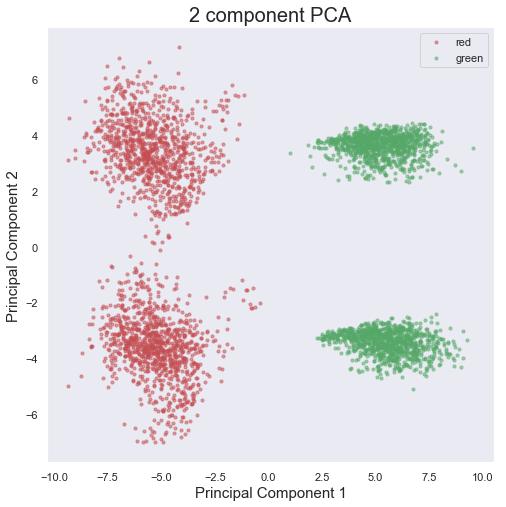

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['red', 'green']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indices = []
    for i in range(len(y)):
        if y_color[i] == str(target):
            indices.append(i)
    ax.scatter(principalDf.loc[indices, 'principal component 1']
               , principalDf.loc[indices, 'principal component 2']
               , c = color
               , s = 10, alpha=0.5)
ax.legend(targets)
ax.grid()

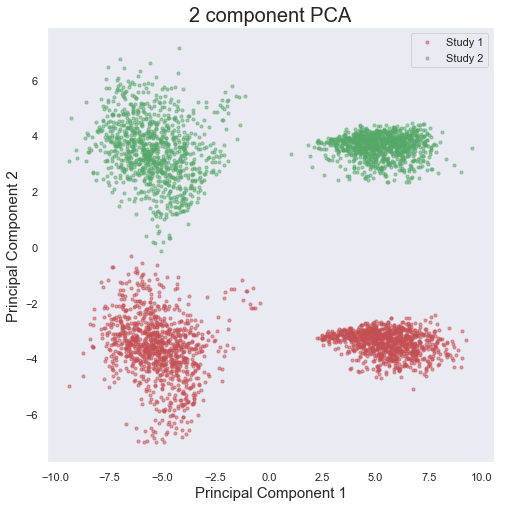

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Study 1', 'Study 2']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indices = []
    for i in range(len(y)):
        if a_study_id[i] == str(target):
            indices.append(i)
    ax.scatter(principalDf.loc[indices, 'principal component 1']
               , principalDf.loc[indices, 'principal component 2']
               , c = color
               , s = 10, alpha=0.5)
ax.legend(targets)
ax.grid()

In [14]:
data = np.load('/Users/rachelh/Programs/rvr/src/data_processing/mnist_digit75_color80test_5050_041020.npz')
x = get_valid_imgs_from_study(data, np.asarray([]))
z = np.load('/Users/rachelh/Programs/rvr/reconstructed_inputs/mnist_digit75_color80test_5050_041020_grid_search_xavier_fair_0_05_recon_0_25_valid_npz/Z.npz')['X']
a = np.load('/Users/rachelh/Programs/rvr/reconstructed_inputs/mnist_digit75_color80test_5050_041020_grid_search_xavier_fair_0_05_recon_0_25_valid_npz/A.npz')['X']
y = np.load('/Users/rachelh/Programs/rvr/reconstructed_inputs/mnist_digit75_color80test_5050_041020_grid_search_xavier_fair_0_05_recon_0_25_valid_npz/Y.npz')['X']

z = StandardScaler().fit_transform(z)

y_study_id = a[:,0]
y_label = y[:,0]

print(y_study_id)
print(np.mean(z))


IOError: [Errno 2] No such file or directory: '/Users/rachelh/Programs/rvr/src/data_processing/mnist_digit75_color80test_5050_041020.npz'

In [328]:
study_1_z = []
study_2_z = []

for i in range(len(z)):
    if y_study_id[i] == 1.0:
        study_1_z.append(z[i])
    elif y_study_id[i] == 0.0:
        study_2_z.append(z[i])

eucl_dist_sum = 0
num_study_1 = len(study_1_z)
counter = 0
for i in range(num_study_1):
    for j in range(i+1, num_study_1):
        eucl_dist_sum += np.linalg.norm(study_1_z[i]-study_1_z[j])
        counter += 1
print(eucl_dist_sum * 1.0 / counter)

9.35631387253335


In [329]:
eucl_dist_sum = 0
num_study_2 = len(study_2_z)
counter = 0
for i in range(num_study_2):
    for j in range(i+1, num_study_2):
        eucl_dist_sum += np.linalg.norm(study_2_z[i]-study_2_z[j])
        counter += 1
print(eucl_dist_sum * 1.0 / counter)

9.387387329914006


In [331]:
eucl_dist_sum = 0
counter =0
for i in range(num_study_1):
    for j in range(num_study_2):
        eucl_dist_sum += np.linalg.norm(study_1_z[i]-study_2_z[j])
        counter += 1
print(eucl_dist_sum * 1.0 / counter)

9.378720902352123


In [332]:
pos_z = []
pos_a = []
neg_z = []
neg_a = []

for i in range(len(z)):
    if y_label[i] == 1.0:
        pos_z.append(z[i])
        pos_a.append(y_study_id[i])
    elif y_label[i] == 0.0:
        neg_z.append(z[i])
        neg_a.append(y_study_id[i])

eucl_dist_sum = 0
num_pos = len(pos_z)
counter = 0
for i in range(num_pos):
    for j in range(i+1, num_pos):
        eucl_dist_sum += np.linalg.norm(pos_z[i]-pos_z[j])
        counter += 1
print(eucl_dist_sum * 1.0 / counter)

8.525982853209475


In [333]:
eucl_dist_sum = 0
num_neg = len(neg_z)
counter = 0
for i in range(num_neg):
    for j in range(i+1, num_neg):
        eucl_dist_sum += np.linalg.norm(neg_z[i]-neg_z[j])
        counter += 1
print(eucl_dist_sum * 1.0 / counter)

9.593323553617461


In [334]:
eucl_dist_sum = 0
counter = 0
for i in range(num_pos):
    for j in range(num_neg):
        eucl_dist_sum += np.linalg.norm(pos_z[i]-neg_z[j])
        counter += 1
print(eucl_dist_sum * 1.0 / counter)

9.68739858833415


In [335]:
eucl_dist_sum = 0
counter = 0
for i in range(num_pos):
    for j in range(i+1, num_pos):
        if pos_a[i] != pos_a[j]:
            eucl_dist_sum += np.linalg.norm(pos_z[i]-pos_z[j])
            counter += 1
print(eucl_dist_sum * 1.0 / counter)

8.557532836241945


In [336]:
eucl_dist_sum = 0
num_neg = len(neg_z)
counter = 0
for i in range(num_neg):
    for j in range(i+1, num_neg):
        if neg_a[i] != neg_a[j]:
            eucl_dist_sum += np.linalg.norm(neg_z[i]-neg_z[j])
            counter += 1
print(eucl_dist_sum * 1.0 / counter)

9.607316608941632


In [337]:
eucl_dist_sum = 0
counter = 0
for i in range(num_pos):
    for j in range(i+1, num_pos):
        if pos_a[i] == 0 and pos_a[j] == 0:
            eucl_dist_sum += np.linalg.norm(pos_z[i]-pos_z[j])
            counter += 1
print(eucl_dist_sum * 1.0 / counter)

8.371456503229615


In [338]:
eucl_dist_sum = 0
counter = 0
for i in range(num_pos):
    for j in range(i+1, num_pos):
        if pos_a[i] == 1 and pos_a[j] == 1:
            eucl_dist_sum += np.linalg.norm(pos_z[i]-pos_z[j])
            counter += 1
print(eucl_dist_sum * 1.0 / counter)

8.605147835527468


In [339]:
eucl_dist_sum = 0
counter = 0
for i in range(num_neg):
    for j in range(i+1, num_neg):
        if neg_a[i] == 0 and neg_a[j] == 0:
            eucl_dist_sum += np.linalg.norm(neg_z[i]-neg_z[j])
            counter += 1
print(eucl_dist_sum * 1.0 / counter)

9.847705946022614


In [340]:
eucl_dist_sum = 0
counter = 0
for i in range(num_neg):
    for j in range(i+1, num_neg):
        if neg_a[i] == 1 and neg_a[j] == 1:
            eucl_dist_sum += np.linalg.norm(neg_z[i]-neg_z[j])
            counter += 1
print(eucl_dist_sum * 1.0 / counter)

9.291948546954387
